In [3]:
install.packages("caret")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [7]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [14]:
install.packages("Metrics")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [15]:
# Load necessary libraries
library(MASS)    # Contains the Boston dataset
library(ggplot2) # For visualization
library(caret)   # For data splitting and regression analysis
library(dplyr)   # For data manipulation
library(corrplot)
library(Metrics)

# Load the dataset
data("Boston")
head(Boston)



Attaching package: ‘Metrics’


The following objects are masked from ‘package:caret’:

    precision, recall




,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [16]:
# View the structure and summary
str(Boston)
summary(Boston)

# Check for missing values
any(is.na(Boston))

# Plot a correlation matrix
cor_matrix <- cor(Boston)
print(cor_matrix)


'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08205   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

[1] FALSE

               crim          zn       indus         chas         nox
crim     1.00000000 -0.20046922  0.40658341 -0.055891582  0.42097171
zn      -0.20046922  1.00000000 -0.53382819 -0.042696719 -0.51660371
indus    0.40658341 -0.53382819  1.00000000  0.062938027  0.76365145
chas    -0.05589158 -0.04269672  0.06293803  1.000000000  0.09120281
nox      0.42097171 -0.51660371  0.76365145  0.091202807  1.00000000
rm      -0.21924670  0.31199059 -0.39167585  0.091251225 -0.30218819
age      0.35273425 -0.56953734  0.64477851  0.086517774  0.73147010
dis     -0.37967009  0.66440822 -0.70802699 -0.099175780 -0.76923011
rad      0.62550515 -0.31194783  0.59512927 -0.007368241  0.61144056
tax      0.58276431 -0.31456332  0.72076018 -0.035586518  0.66802320
ptratio  0.28994558 -0.39167855  0.38324756 -0.121515174  0.18893268
black   -0.38506394  0.17552032 -0.35697654  0.048788485 -0.38005064
lstat    0.45562148 -0.41299457  0.60379972 -0.053929298  0.59087892
medv    -0.38830461  0.36044534 -0

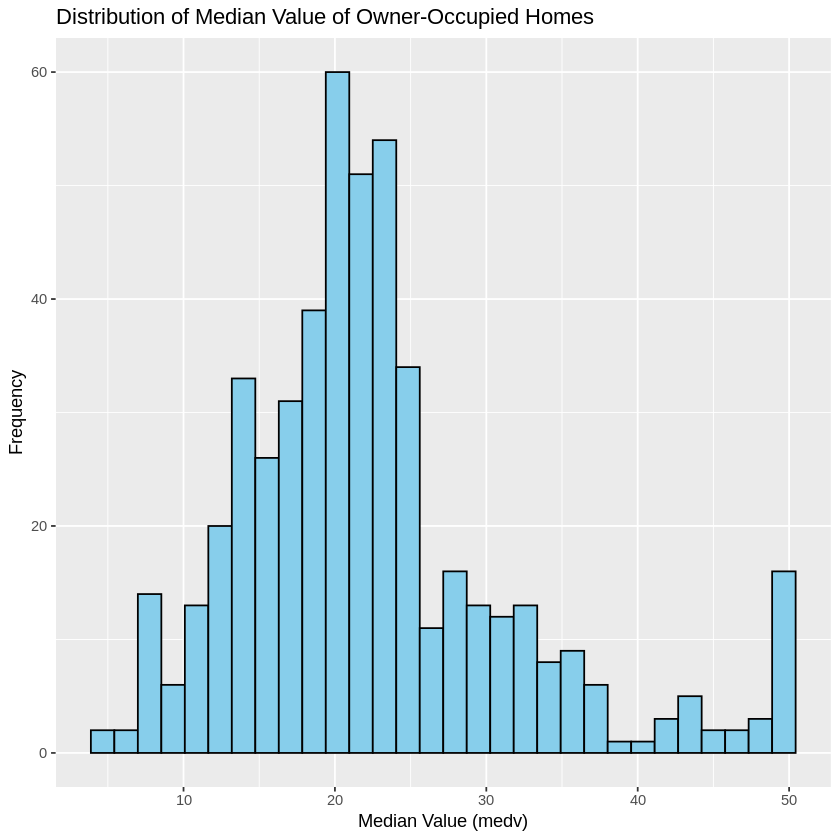

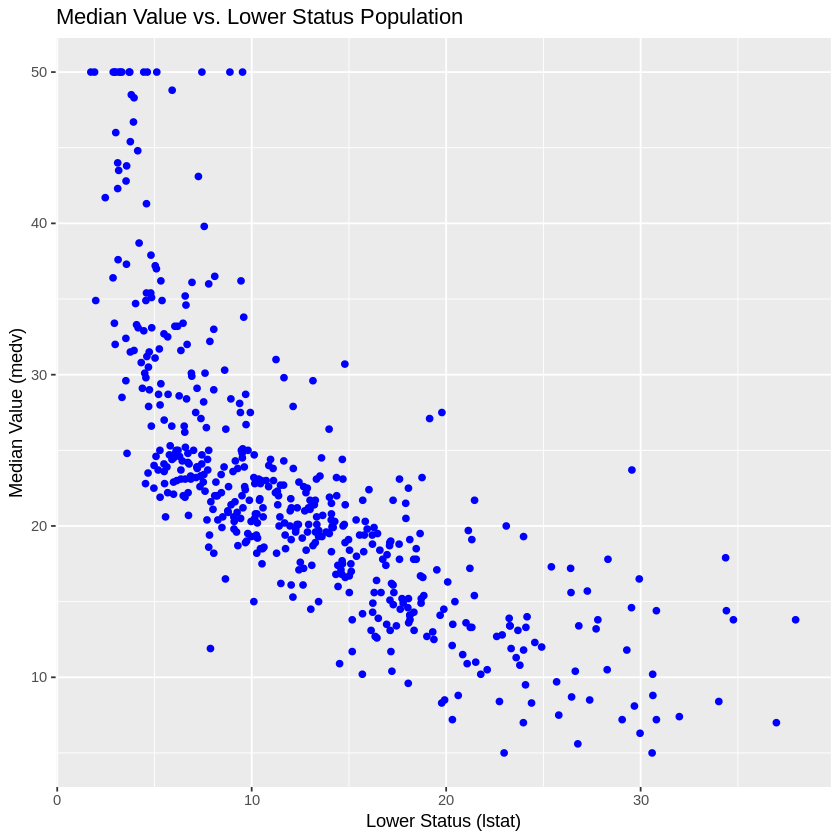

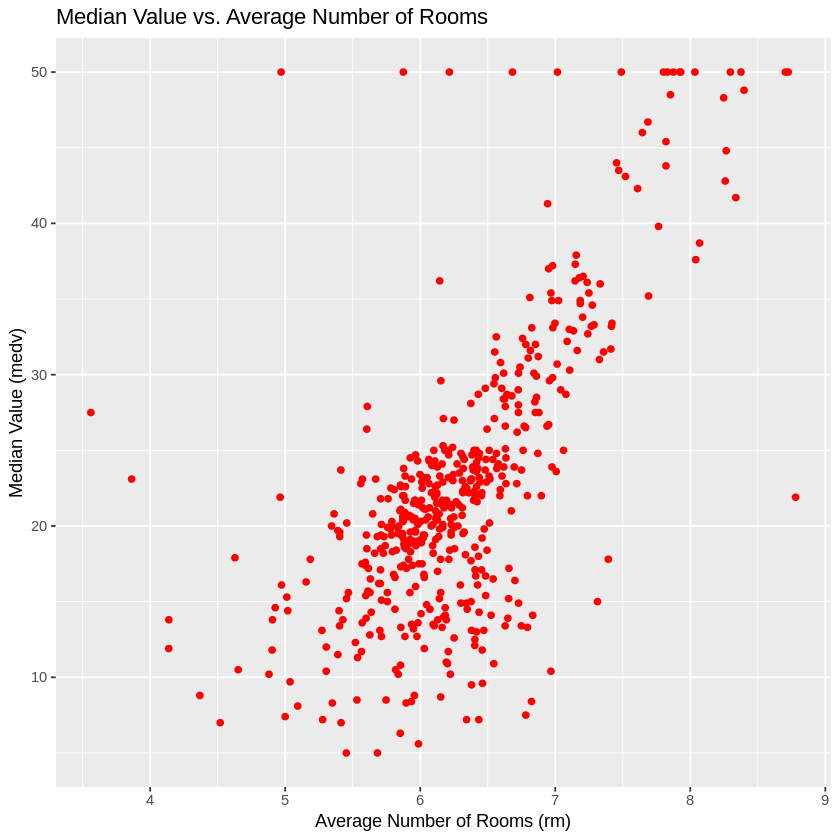

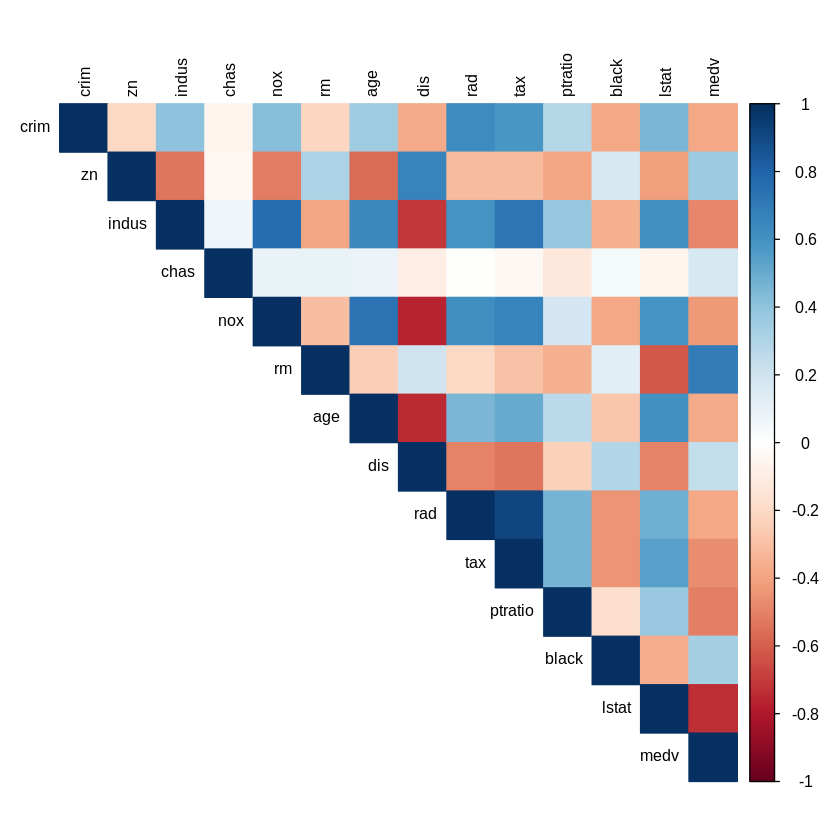

In [17]:
# Histogram of 'medv' (Median Value)
ggplot(Boston, aes(x = medv)) +
  geom_histogram(bins = 30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Median Value of Owner-Occupied Homes", x = "Median Value (medv)", y = "Frequency")

# Scatter plot of 'medv' vs. 'lstat' (lower status of population)
ggplot(Boston, aes(x = lstat, y = medv)) +
  geom_point(color = "blue") +
  labs(title = "Median Value vs. Lower Status Population", x = "Lower Status (lstat)", y = "Median Value (medv)")

# Scatter plot of 'medv' vs. 'rm' (average number of rooms)
ggplot(Boston, aes(x = rm, y = medv)) +
  geom_point(color = "red") +
  labs(title = "Median Value vs. Average Number of Rooms", x = "Average Number of Rooms (rm)", y = "Median Value (medv)")

# Correlation heatmap
library(corrplot)
corrplot(cor_matrix, method = "color", type = "upper", tl.col = "black", tl.cex = 0.8)


In [19]:
# Split the data into training (70%) and test (30%) sets
set.seed(123)
trainIndex <- createDataPartition(Boston$medv, p = 0.7, list = FALSE)
trainData <- Boston[trainIndex, ]
testData <- Boston[-trainIndex, ]


In [20]:
# Fit a linear regression model
lm_model <- lm(medv ~ ., data = trainData)
summary(lm_model)



Call:
lm(formula = medv ~ ., data = trainData)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.491  -2.753  -0.499   1.942  24.549 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  33.593363   5.735441   5.857 1.11e-08 ***
crim         -0.091542   0.038713  -2.365 0.018605 *  
zn            0.029760   0.016233   1.833 0.067624 .  
indus        -0.043242   0.070898  -0.610 0.542320    
chas          2.911364   0.997890   2.918 0.003762 ** 
nox         -16.335169   4.467780  -3.656 0.000296 ***
rm            3.964627   0.458191   8.653  < 2e-16 ***
age           0.001477   0.015580   0.095 0.924507    
dis          -1.271695   0.230636  -5.514 6.93e-08 ***
rad           0.276750   0.074258   3.727 0.000227 ***
tax          -0.010817   0.004152  -2.605 0.009589 ** 
ptratio      -0.928753   0.152052  -6.108 2.74e-09 ***
black         0.008713   0.002988   2.916 0.003781 ** 
lstat        -0.484062   0.062091  -7.796 7.77e-14 ***
---
Signif. codes:

In [21]:
# Predict on the test set
predictions <- predict(lm_model, newdata = testData)

# Calculate performance metrics: RMSE and R-squared
library(Metrics)
rmse_val <- rmse(testData$medv, predictions)
cat("RMSE:", rmse_val)

r_squared <- summary(lm_model)$r.squared
cat("R-squared:", r_squared)


RMSE: 5.101768R-squared: 0.7481554